## Exploratory Analysis

In this lab, we will be performing exploratory data analysis and simple linear regression on a data set of housing prices from Ames, Iowa. This is a famous data set both for its size and relative completeness and will serve as an introduction to some off the simpler aspects of data visualization, data cleaning, and the kinds of choices you have to make to get to the point of performing a numerical analysis. 

This lab will start with a brief description of types of data and some practice with data visualization. In the second half, we will perform one variable and multivariable linear regression. 

This lab is based partially on the excellent tutorial by Lee Clemmer: https://www.kaggle.com/leeclemmer/exploratory-data-analysis-of-housing-in-ames-iowa

## Types of data:

#### Sigular Datatypes
* __Booleans__: Variables that take `True` and `False` as values.
* __Integers__: Whole numbers, eg `n = 1232` or `-12`.
* __Floating Point Numbers__: Decimal numbers, eg `f = 12.342` or `1.79e+308`.
* __Strings__: A list of characters, surrounded by `''` or `""`, eg `'This is a string.'`.

#### Types of Collections of Data

* __Lists__: Ordered collections of numbers, strings, floats, of other lists. For example, `[]` is the empty list, `[1,2,3]`, `[[1,2],'Sandwich',4]`. Lists are ordered, with the indexing starting at 0 and counting up.

In [20]:
y = [[1,2],'Sandwich',4]

print(y[0])
print(y[1])
print(y[2])

[1, 2]
Sandwich
4


* __Dictionaries__: Dictionaries are like lists, but values are stored by a __key__ instead of by an index. A dictionary  is defined by curly braces 

`{'key1': 1, 'key2':[1,2,], 'key3':'Some Text!'}`

In [21]:
y = {'Color':'Blue', 'Number': 4, 'List': [1,2,3]}

print(y['Color'])
print(y['Number'])
print(y['List'])

Blue
4
[1, 2, 3]


#### Matrices with numpy
Matrix operations can be found in the `numpy` library. Numpy allows easy and efficient matrix operations, as well as some matrix creation mechanism. To create a $2\times 2$ matrix, we use a list `[]` of lists of columns 

`[[col1],[col2],[col3],...]` 

For example, the matrix

$$
y = \left(\begin{matrix}1&2\\3&4\end{matrix}\right)\,,
$$
you use

`y = np.matrix(  [[1,2],[3,4]]  )`

The following are useful matrix commands

* __Transpose__: `A.T`
* __Inverse__: `A.I`
* __Matrix of 0's__: To produce a `n` by `m` matrix of `0`'s, `np.zeros([n,m])`.
* __Matrix of 1's__: To produce a `n` by `m` matrix of `0`'s, `np.ones([n,m])`.
* __Identity Matrix__: For an `n` by `m` identity matrix, `np.eye(n)`.
* __Random Matrix__: A uniform random matrix of size `n` by `m`, can be created with `np.random.random([n,m])`.

In [22]:
import numpy as np

x = np.random.random([3,2])
y = np.matrix( [[12,3],[1,4]] )

display(x)                       # We will explain the display function  below
display(y)
display(x*y)
display(y.T)
display(y.I)
display(y.shape)

array([[0.21724938, 0.10176568],
       [0.50744182, 0.70140193],
       [0.78180645, 0.61422492]])

matrix([[12,  3],
        [ 1,  4]])

matrix([[2.70875819, 1.05881085],
        [6.79070375, 4.32793317],
        [9.99590229, 4.80231901]])

matrix([[12,  1],
        [ 3,  4]])

matrix([[ 0.08888889, -0.06666667],
        [-0.02222222,  0.26666667]])

(2, 2)

### Displaying output

In the IPython uses two main functions to display output: 

* The python function `print(x)` function prints the raw text of a variable. Print can also be used to construct strings: try setting a value for `n=` and typing `print("There were ", n, "clones chasing me.")` below. Note that Python automatically adds a space between each argument. 

In [23]:
n = 7
print("There were", n, "clones chasing me.")

There were 7 clones chasing me.


* The IPython function `display(x)` returns the values of `x`, but possibly along with other formatting information. Notice above that if we print the matrix `y` we just get the values, whereas if we `display` it we get some extra information about what type of variable it is.

In [24]:
display(y)

print(y)

matrix([[12,  3],
        [ 1,  4]])

[[12  3]
 [ 1  4]]


#### Data frames with pandas

A data frame is Python's version of a spreadsheet. It is a matrix where you can label columns and rows and retrieve  information by those labels. Jupyter naturally displays dataframes nicely. A data frame can constructed from a dictionary, where the keys are the column names. Dataframes play particularly nicely with the `display` function.

In [25]:
import pandas as pd

d = {'Column 1': [1,2,3,4], 'Column 2': [5,6,7,8]}
df = pd.DataFrame(d)
display(df)

,Column 1,Column 2
0,1,5
1,2,6
2,3,7
3,4,8


A data frame can also be created from a matrix by specifying the column names when the dataframe is created:

In [26]:
x = np.random.random([2,2])
df = pd.DataFrame(x, columns=['Column 1','Column 2'])
display(df)

,Column 1,Column 2
0,0.184188,0.734021
1,0.588362,0.021523


You can access the data from a dataframe by the column name:

In [27]:
df['Column 1']

0    0.184188
1    0.588362
Name: Column 1, dtype: float64

## Exploring Data

We will download the Ames, Iowa house pricing data from github. The file itself is a CSV with column headers and so we will use pandas to read it in as a data frame. 

The first step in any data analysis is to understand the data set at a high level, where its coming from and what it indicates:

<div class="alert alert-block alert-info">
DESCRIPTIVE ABSTRACT: Data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.<br><br>

SOURCES: <br>
Ames, Iowa Assessor’s Office <br><br>

VARIABLE DESCRIPTIONS:<br>
Tab characters are used to separate variables in the data file. The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers). <br><br>

Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data<br>
Full Description: https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Datasets/Ames/data_description.txt<br>
</div>

In [28]:
import pandas as pd

url = 'https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Datasets/Ames/train.csv'

ames = pd.read_csv(url, error_bad_lines=False)
ames

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### Exploring Datasets:

After reading the high level description, we are ready to dig into the dataset itself. Just displaying the data gave us some information: A brief look at  the content of the columns along with a description of the size, 1460 rows × 81 columns.

There are a few commands particularly useful for first pass data analysis:

* `type(x)` returns the data type of a variable `x`. In this case we know `ames` is a dataframe but this may not always be so clear. 
* `DataFrame.head(n)` a data frame has quite a few built in functions associated with it. The head function returns the first `n` columns of the data frame. To use the head function to display the first 5 rows we use `ames.head(5)`.
* `DataFrame.tail(n)` displays the last `n` columns of the dataframe.
* `DataFrame.shape` is a varaible defining the dimensions of the dataset. You can retrieve them, or change them by changing this variable. 

Lets try these out below

In [29]:
display(type(ames))
display(ames.head(5))
display(ames.tail(5))
print("Our datasets has dimensions", ames.shape)
#print("Our datasets has dimensions", ames.shape[0], "by", ames.shape[1])

pandas.core.frame.DataFrame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


Our datasets has dimensions (1460, 81)


Looking at the output, we make a couple of immediate observations

* Jupyter isn't displaying all 81 of the columns. This is okay, we can get information about them later but it's good to note. 
* We have a large mixture of variable types, some numerical (__Lotarea__) some categorical (__MSZoning__) and others that could be either (__MSSubClass__). You can always check the documentation. 
* The value `NaN` standing for "not a number" keeps appearing. This usually means there's no information about that feature of that particular property. We will have to deal with `NaN` values later. 

We can actually get some information about the data type of each feature and how many values are `NaN` by using the `DataFrame.info()` function. We can also at least get a list of column names using `list(ames)`.

In [30]:
names = list(ames)
print(names)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [31]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We can immediately read off which columns are numbers and which are other objects. All of this will help us in deciding on which variables its meaningful to use regression to predict the housing price. 

We also see that __PoolQC__, __Fence__, __MiscFeature__ all contain a very small number of non-null objects. A non-null object is any value that isn't `NaN`, so this is saying that we mostly don't have data about __PoolQC__, __Fence__, __MiscFeature__. 

<div class="alert alert-block alert-warning">
<b>Stats Corner:</b> Be warned, being a number does not mean the feature should be treated as numeric. Remember that there are 4 main variable types in statistics:
<ul><li><b>Discrete:</b> varaibles that take a finite number of values with no relation between the values. For example, type of fruit.</li>
    <li><b>Ordinal:</b> variables whose values for a set with a well ordering. For example, stars on a yelp review. 3 is better than 2 but there is no other quantifiable evaluation we can make.  
    <li><b>Interval:</b> continuous variables without a fixed, meaningful 0. For example, temperature in $^\circ C$ can take a continuous value, but $2^\circ C$ isn't twice as hot as $1^\circ C$.
    <li><b>Ratio:</b> continuous variables with a fixed, meaningful 0.
</ul>
Regression might not make sense on discrete variables, and must be more carefully interpreted for ordinal variables. We can however perform regression on binary discrete variables since different choices of order would lead to linear functions differing only by a sign. 
</div>

Finally, lets get some idea of what the target range is. The variable we will try to fit is __SalePrice__ so lets use matplotlib to get an idea of what the data looks like.

#### Plotting Data

We will use `matplotlib` to do most of our plotting. There are some more advanced libraries for producing more complicated graphics objects like maps and network graphs but we will only bring those in when needed. 

We will start my importing `pyplot` from the `matplotlib` library and using the `hist` function to display a histogram of the sale price data.

In [32]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

ax.hist(ames.SalePrice,bins=75, rwidth=.8)
plt.show()

<Figure size 640x480 with 1 Axes>

Here, the axis `ax` refers to the specific picture while `fig` refers to an invisible container around it that may contain many pictures inside it. 

This is a good start, but we should always try to make our plots meaning but adding annotation. In this case, lets give the plot a title, label the axes and increase the size of the figure a bit.

* `ax.xlabel("X Label")` sets the x axis label for the picture. We can set the fontsize by including `fontsize=`.
* `ax.ylabel("Y Label")` sets the y axis label for the picture.
* `ax.set_title("Title")` sets the title for the picture. 
* `fig.set_size_inches(10, 7)` sets the dimensions of the image

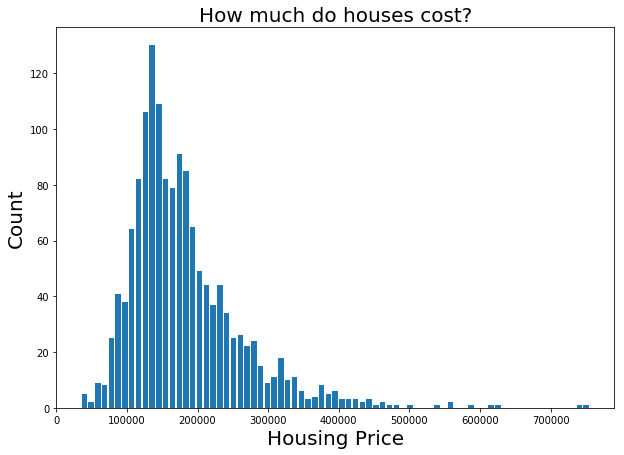

In [33]:
fig, ax = plt.subplots()

ax.hist(ames.SalePrice,bins=75, rwidth=.8)
ax.set_xlabel("Housing Price", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
ax.set_title("How much do houses cost?", fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

Let get the minimum, maximum and average housing cost.

In [34]:
print("Minimum Housing Cost:", min(ames.SalePrice))
print("Minimum Housing Cost:", max(ames.SalePrice))
print("Minimum Housing Cost:", np.mean(ames.SalePrice))

Minimum Housing Cost: 34900
Minimum Housing Cost: 755000
Minimum Housing Cost: 180921.19589041095


Lets explore some of the other variables, lets take a look at lot size:

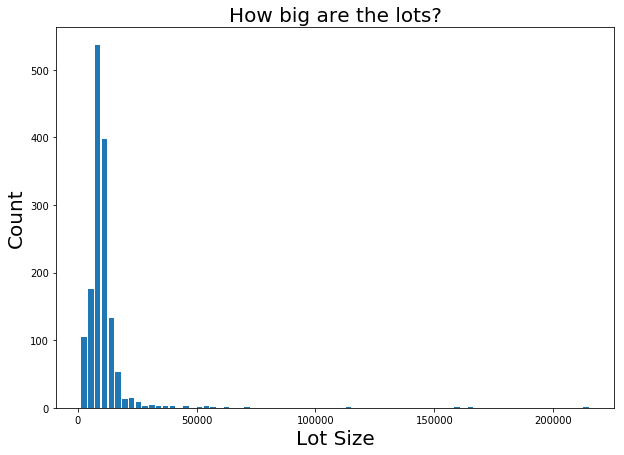

In [35]:
fig, ax = plt.subplots()

ax.hist(ames.LotArea,bins=75, rwidth=.8)
ax.set_xlabel("Lot Size", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
ax.set_title("How big are the lots?", fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

Notice that there are a couple of lots that are so extreme that they're not giving us a very good look at the center. Lets cut out all the value above 50,000 sq ft and plot again. We define a logical index `z=ames.LotArea<50000`, which is just a vector of true and false values. If we put this index into a array of the same size, it will only return that values for which the index `z` is true:

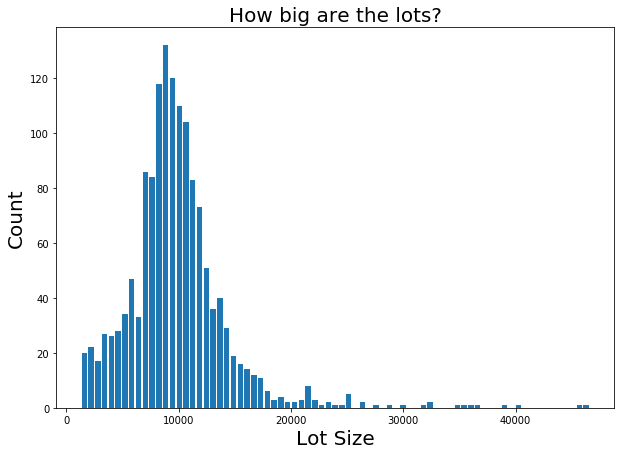

In [36]:
fig, ax = plt.subplots()

z = ames.LotArea<50000

ax.hist(ames.LotArea[z],bins=75, rwidth=.8)
ax.set_xlabel("Lot Size", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
ax.set_title("How big are the lots?", fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

## Scatter Plots for Numerical Features

In this lab, we really want to look at the numerical features, and in fact only the ordinal features. To pull out the values we will use another built in function of dataframes, the `select_dtype` function:

* `DataFrame.select_dtypes(include=['dtype1','dtype2'])` returns a dataframe that only includes the datatypes `'dtype1'`, `'dtype2'`, etc.

In this case we want to extract the numerical columns, so we will include `int64` and `float64`.

In [37]:
nums = ames.select_dtypes(include=['int64','float64'])
display(nums.head(5))

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


For an pair of features, we can form the scatter plot with `matplotlib`'s `plt.plot` function. Without any extra parameters, `plt.plot` returns a line plot, but we can set it to a scatter plot by including a format string, in this case `'o'` (lowercase o). 

* `ax.plot(x,y,'o')` Plots points whose $x$ coordinates are given in the first vector and whose $y$ coordinates are given in the second vector. The format string `'o'` indicates a scatter plot. 

To see some other options for formatting, take a look through matplotlibs own tutorial here: https://matplotlib.org/tutorials/introductory/pyplot.html

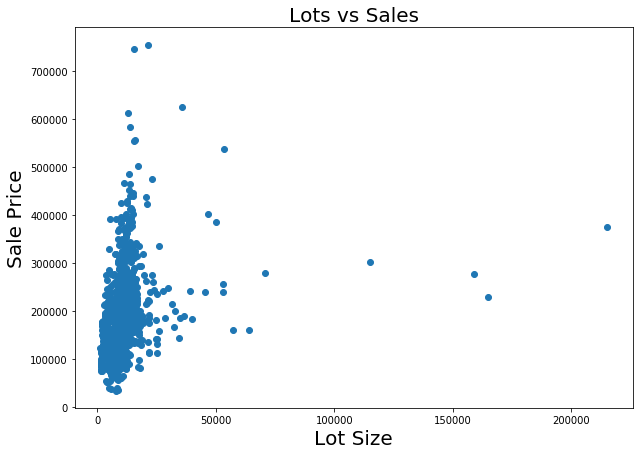

In [38]:
fig, ax = plt.subplots()

ax.plot(nums.LotArea,nums.SalePrice,'o')
ax.set_xlabel("Lot Size", fontsize=20)
ax.set_ylabel("Sale Price", fontsize=20)
ax.set_title("Lots vs Sales", fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

Again, we can cut out the outliers using the logical index `z` from before.

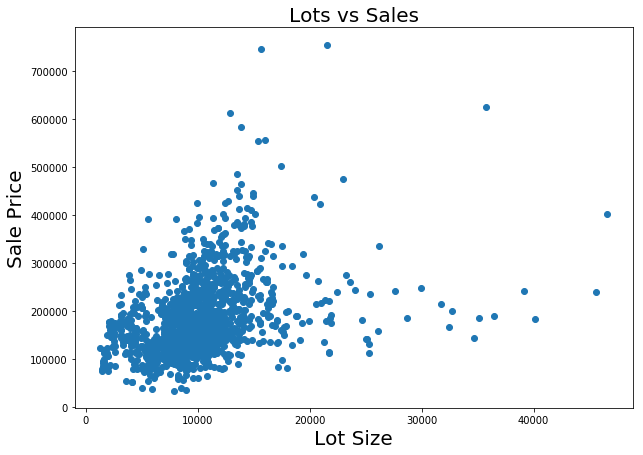

In [39]:
fig, ax = plt.subplots()

ax.plot(nums.LotArea[z],nums[z].SalePrice,'o')
ax.set_xlabel("Lot Size", fontsize=20)
ax.set_ylabel("Sale Price", fontsize=20)
ax.set_title("Lots vs Sales", fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

And in fact we may just want to excise them all together:

In [40]:
numsc = nums[z]   ## Here, the c stands for "cleaned"

Lets compare some of the other data sets:

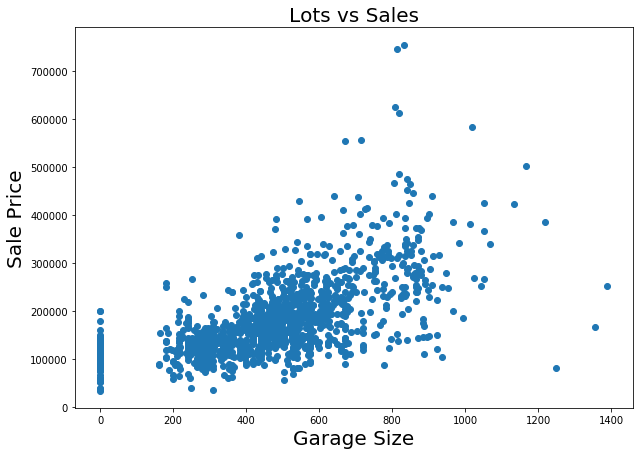

In [41]:
fig, ax = plt.subplots()

ax.plot(numsc.GarageArea,numsc.SalePrice,'o')
ax.set_xlabel("Garage Size", fontsize=20)
ax.set_ylabel("Sale Price", fontsize=20)
ax.set_title("Lots vs Sales", fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

#### Subplots

To compare multiple features at once it's useful to create a matrix of side by side subplots. To create such a matrix, we edit the subplots call to include a shape vector describing the number of subplots we want

* `fig, axes = plt.subpolots(m,n)` returns an `m` by `n` matrix of subplots. It stores the reference varisble for each subplot in the matrix of subplots in the list `axes`. It also returns a reference to the overall figure containing the subplots, which we store in `fig`. You can plot to the subplot in position (i,j) with `axes[i,j].plot(xvalues, yvalues)`.

We can also specify the names inside the call to each plot

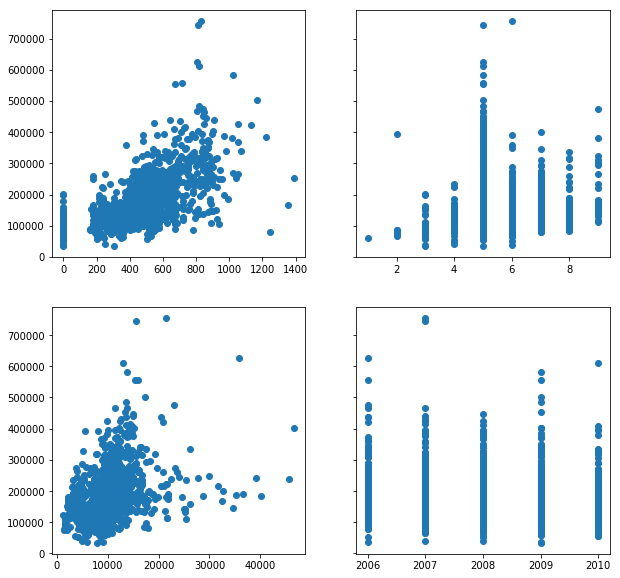

In [42]:
fig, axes = plt.subplots(2,2, sharey=True)
fig.set_size_inches(10, 10)

axes[0,0].plot(numsc.GarageArea,numsc.SalePrice,'o')
axes[1,0].plot(numsc.LotArea,numsc.SalePrice,'o')
axes[0,1].plot(numsc.OverallCond,numsc.SalePrice,'o')
axes[1,1].plot(numsc.YrSold,numsc.SalePrice,'o')

plt.show()

We would like to see all scatterplots for all of the variables, properly named. To achive this we will loop through all of the data using a for loop. Using `list(numsc)` and the `len` function we can get the lenth of the list of column names for the numeric columns. 

In [43]:
nnames = list(numsc)
len(nnames)

38

We see that there are 38 columns containing numeric data, one of which contains the sales price. This can be roughly a $4\times 10$ grid. 

One way to display all of the scatter plots is to loop through the axes using two for loops, one running over the columns `m` and one over the rows `n`. The other way is to flatten the 2d array into a list of axes handlers and just loop through the list. In this case, we'd flatten our $4\times 10$ grid into a single vector of length 40 using `.reshape()`. For example,

In [44]:
A =  np.matrix([[0, 1],
                [2, 3],
                [4, 5],
                [6, 7]])
print(A)
print(A.reshape(2,4))
print(A.reshape(8))

[[0 1]
 [2 3]
 [4 5]
 [6 7]]
[[0 1 2 3]
 [4 5 6 7]]
[[0 1 2 3 4 5 6 7]]


For the grid of scatter plots we start with a 4 by 10 array, reshape it a length 40 array, and finally loop through it, plotting the scatter plots as we go. We do have to call the scatter plots by name, so we will actually use the `i`'th index of the `nnames` vector. 

We also want to label each axis, we can do this with 

`axes[i].set_title(nnames[i], fontsize=16)`

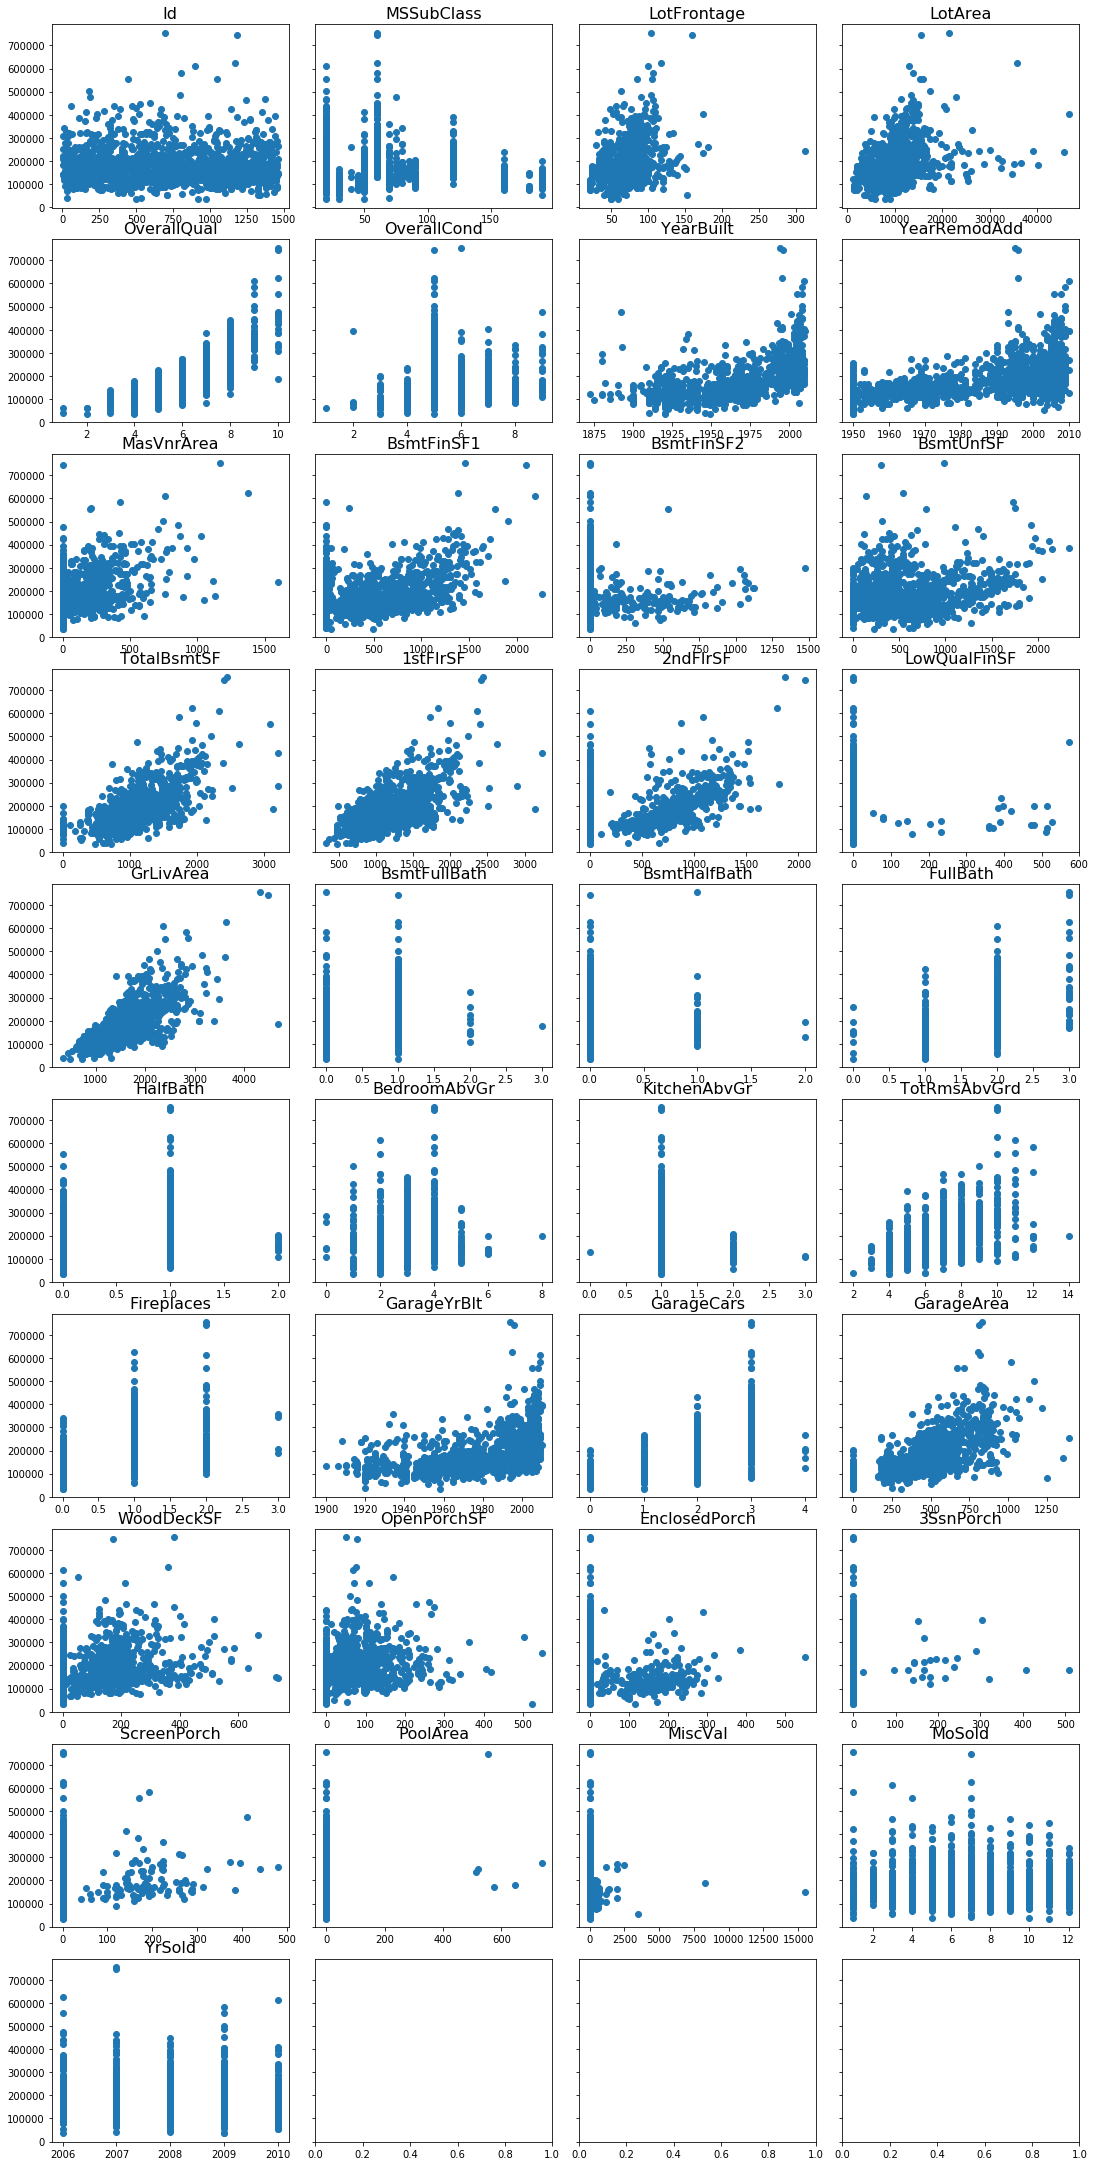

In [45]:
f, axes = plt.subplots(10, 4, sharey = True)
f.set_size_inches(15,30)
f.tight_layout()

axes = axes.reshape(40)

for i in range(0,37):
#    print(nnames[i])
    axes[i].plot(numsc[nnames[i]],numsc.SalePrice,'o')
    axes[i].set_title(nnames[i], fontsize=16)

To clean this display up a bit, we can drop `id` from the list of numeric variables as it appears to be essentially random. 

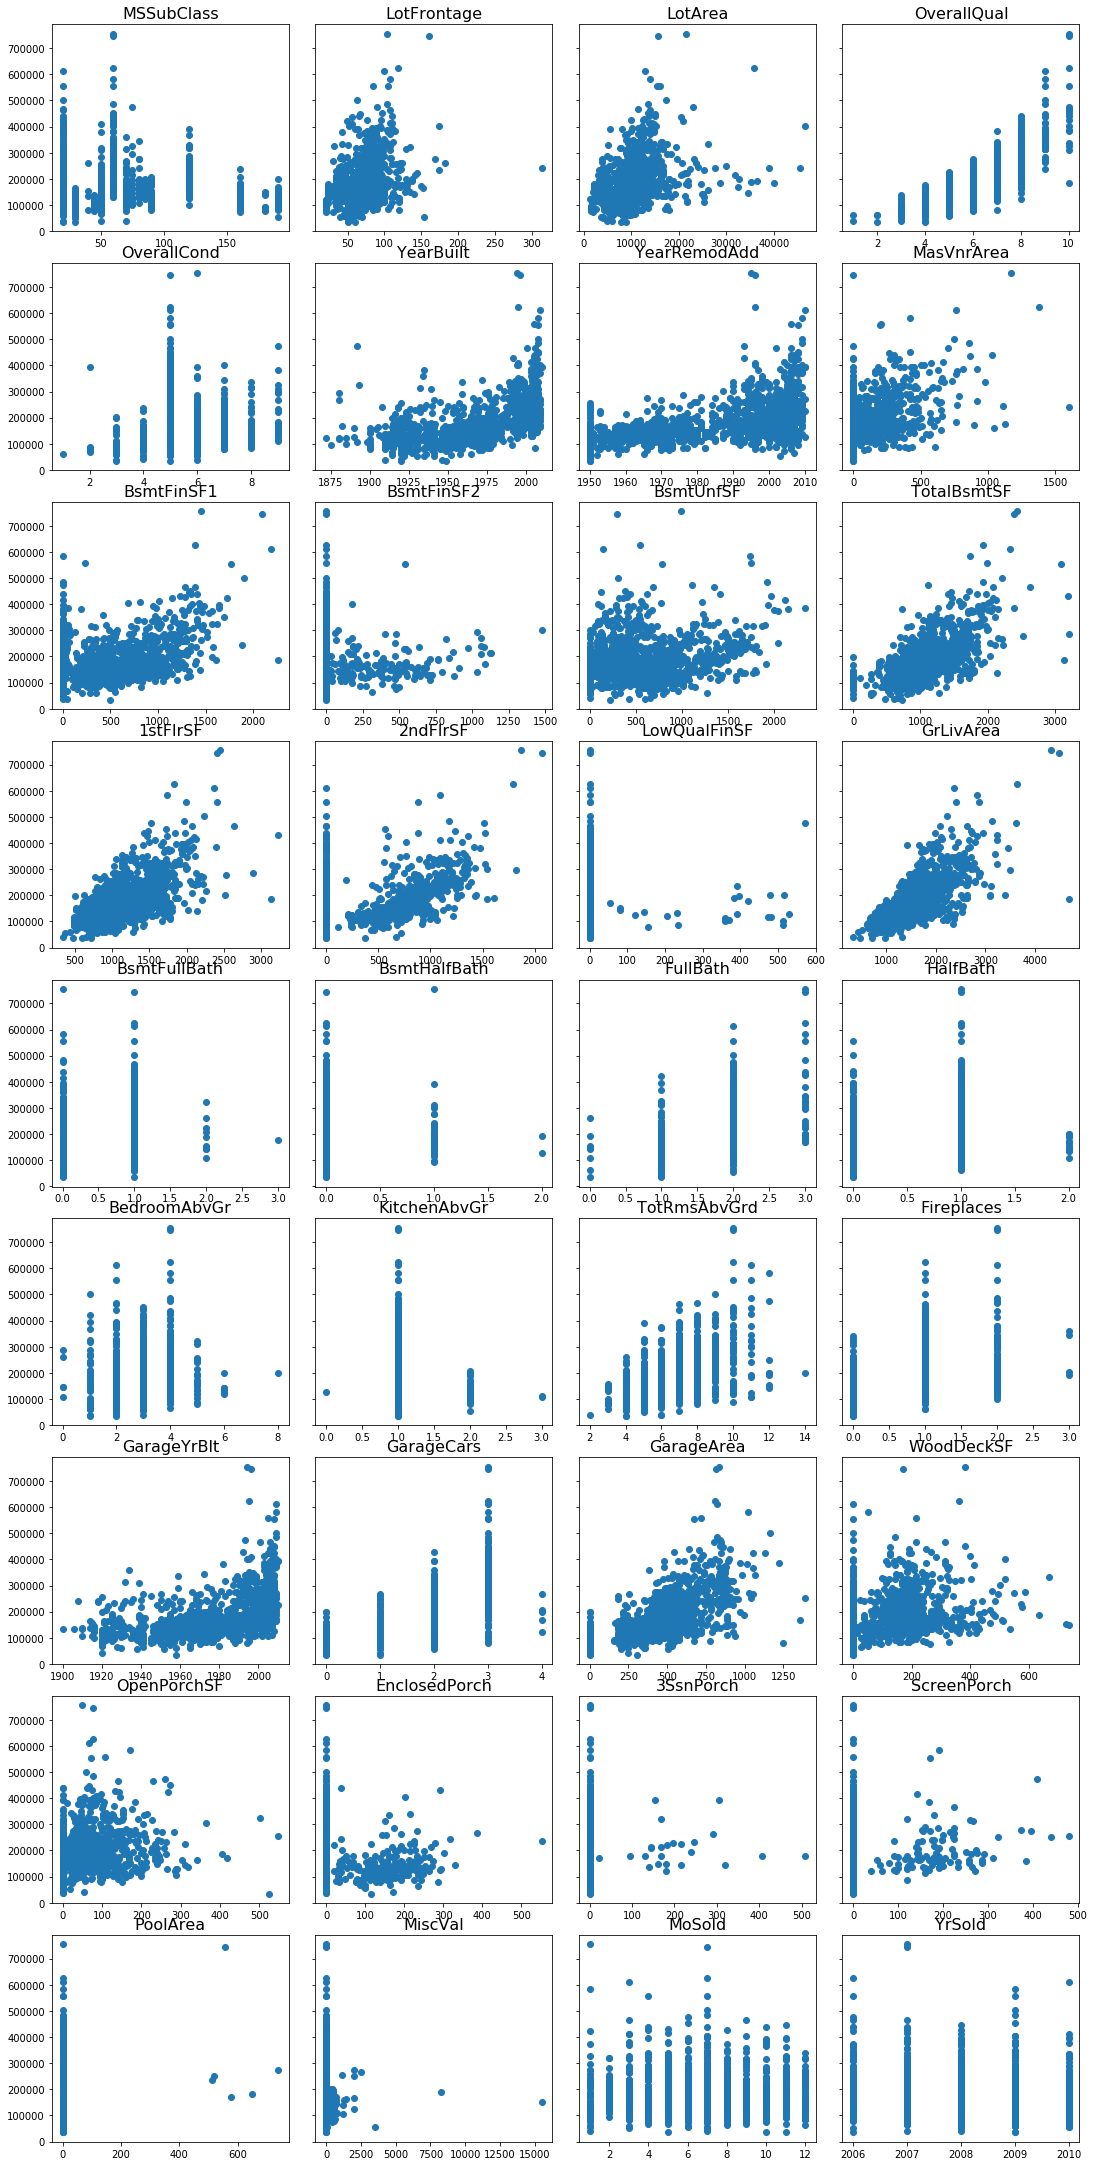

In [46]:
f, axes = plt.subplots(9, 4, sharey = True)
f.set_size_inches(15,30)
f.tight_layout()

axes = axes.reshape(36)

for i in range(0,36):
#    print(nnames[i])
    axes[i].plot(numsc[nnames[i+1]],numsc.SalePrice,'o')
    axes[i].set_title(nnames[i+1], fontsize=16)

A quick glance immediately tells us which variables should be treated as discrete or ordinal (which we have to be more careful about fitting with linear regression) and which should be treated as interval or ratio (which is linear regression's natural setting). 

There are many type of plots we could produce this way. For exploratory data analysis another type of plot could include frequency data.

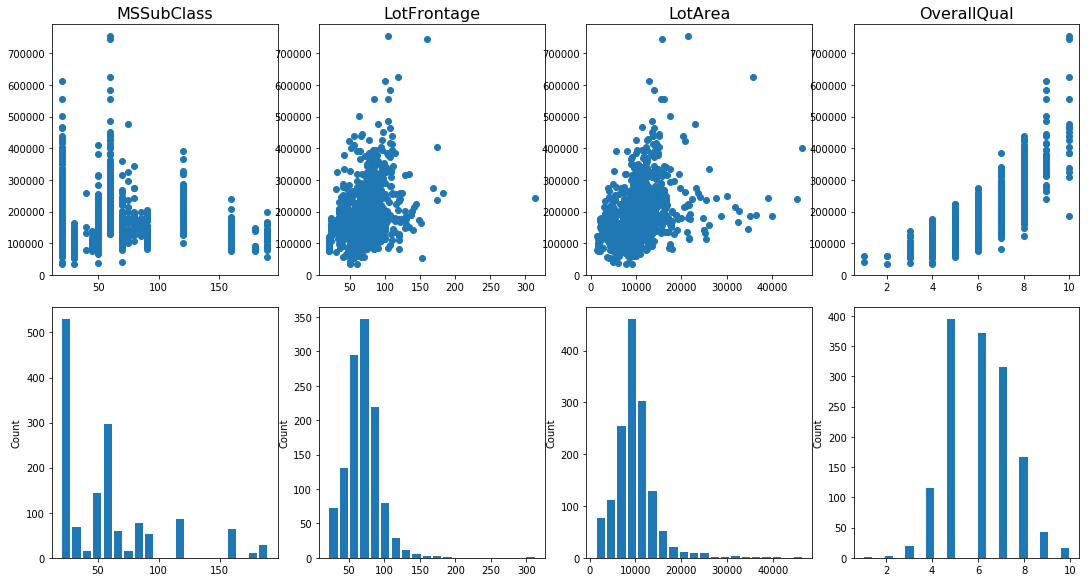

In [47]:
f, axes = plt.subplots(2, 4)
f.set_size_inches(15,8)
f.tight_layout()

axes = axes.reshape(8)

for i in range(0,4):
#    print(nnames[i])
    axes[i].plot(numsc[nnames[i+1]],numsc.SalePrice,'o')
    axes[i].set_title(nnames[i+1], fontsize=16)
    
    z = numsc[nnames[i+1]].notnull()
    axes[i+4].hist(numsc[nnames[i+1]][z],bins=20, rwidth=.8)
    axes[i+4].set_ylabel("Count")

## Correlation Plot

As a last bit of exploratory analysis before moving on to prediction we will produce and plot the correlation matrix for the numerical features. To do so we will use Seaborn, a library for statistical data visualization built on top of `matplotlib`. There is of course the usual debate in the community about whether you should learn seaborn first, since it's easier and more elegant or if you should learn matplotlib first, since it's more fundamental. 

* `DataFrame.corr()` is a built in function that compute the correlation between the columns of a dataframe. 

We will use seaborns `sns.heatmap` function to produce a plot of all of the correlations. Seaborn often does an excellent job of displaying things on its own, but it is also deeply customization. In this case, we'll add a `linewidths=0.05` argument to make the correlation more distinct and use the `cmap="magma"` option to get a slightly more readable color scheme. 

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Datasets/Ames/train.csv'

ames = pd.read_csv(url, error_bad_lines=False) # Load Ames Data
ames

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
nums = ames.select_dtypes(include=['int64','float64']) # Get only numerical features

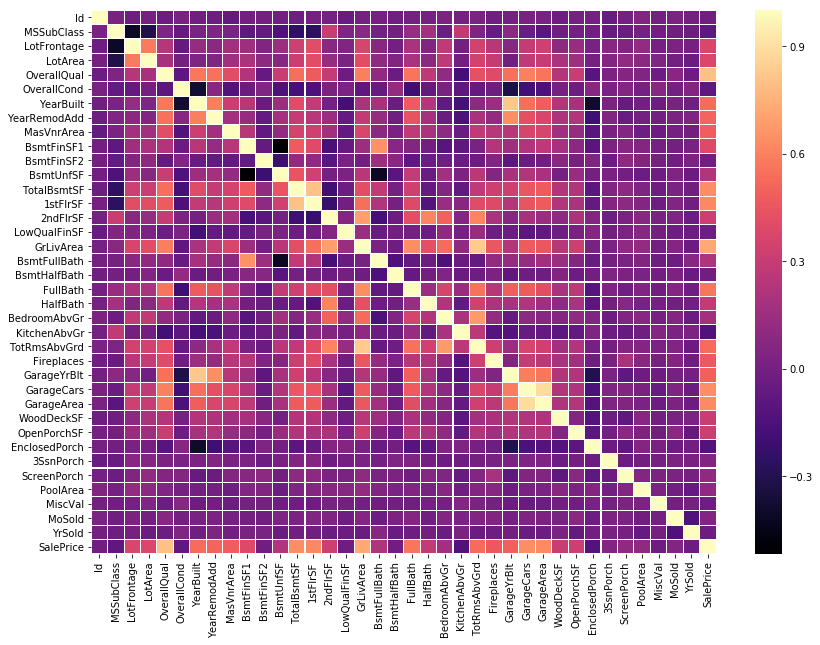

In [48]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(14, 10))

#sns.set(font_scale=1.4)
sns.heatmap(numsc.corr(), ax=ax, linewidths=0.05,cmap="magma")
plt.show()

We see that __OverallQual__, __TotalBsmtSF__, __1stFlrSF__, __GarageArea__, __GrLivArea__, are all highly correlated with sales price. So high value houses have big garages, and large square footage and are overall of good quality.

## Simple Plotting for Categorical Data

So far we have been discussing the numerical features only, but Seaborn provides many options for visualizing categorical features. The most basic the count plot and it will display number of each feature for a given category:

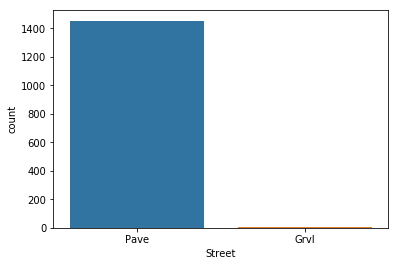

In [136]:
import seaborn as sns

ax = sns.countplot(x='Street', data=ames)

We can select the categorical features be selecting the datatype as before, but this time we will select the `'object'` types. 

In [142]:
cats = ames.select_dtypes(include=['object'])
cats

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


For each feature, we can find the count for each category using `pd.value_counts()`. For example, for the neighborhood we find

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


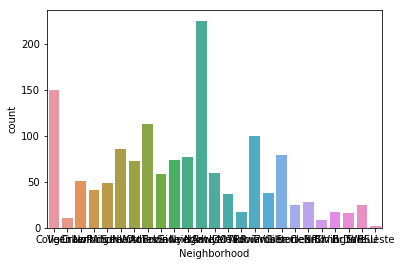

In [145]:
print(cats['Neighborhood'].value_counts())
sns.countplot(x="Neighborhood", data=cats)

We can then rotate the labels to be more readable using `sns.set_ticklabels(rotate=)` as below:

[Text(0,0,'CollgCr'),
 Text(0,0,'Veenker'),
 Text(0,0,'Crawfor'),
 Text(0,0,'NoRidge'),
 Text(0,0,'Mitchel'),
 Text(0,0,'Somerst'),
 Text(0,0,'NWAmes'),
 Text(0,0,'OldTown'),
 Text(0,0,'BrkSide'),
 Text(0,0,'Sawyer'),
 Text(0,0,'NridgHt'),
 Text(0,0,'NAmes'),
 Text(0,0,'SawyerW'),
 Text(0,0,'IDOTRR'),
 Text(0,0,'MeadowV'),
 Text(0,0,'Edwards'),
 Text(0,0,'Timber'),
 Text(0,0,'Gilbert'),
 Text(0,0,'StoneBr'),
 Text(0,0,'ClearCr'),
 Text(0,0,'NPkVill'),
 Text(0,0,'Blmngtn'),
 Text(0,0,'BrDale'),
 Text(0,0,'SWISU'),
 Text(0,0,'Blueste')]

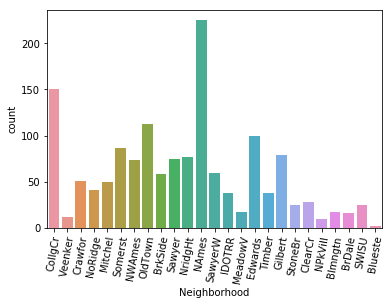

In [150]:
cp = sns.countplot(x="Neighborhood", data=cats)
cp.set_xticklabels(cp.get_xticklabels(),rotation=80)

### Categorical Scatter Plots (New in seaborn 0.9)

Categorical scatter plots allow us to display continuous numerical data against the categories. For example, to display housing price against neighborhood, we use `sns.catplot`:

In [3]:
cp = sns.catplot(x="Neighborhood", y="SalePrice", data=ames);
cp.set_xticklabels(rotation=80)

NameError: name 'sns' is not defined

For further information about using Seaborn to plot categorical data, take a look at the guide here:

https://seaborn.pydata.org/tutorial/categorical.html

## Exercises:

### Exercise:

Use a `for` loop as we did above to produce count plots for each of the categorical variables. 

### Exercise:

Use a for loop to construct the categorical scatter plots with `x` each categorical feature and `y` the sale price. You will need to loop of a list of feature names, which can be gotten using `list(cats)`

In [ ]:
cats = ames.select_dtypes(include=['object'])

for feature in list(cats):
    

## Problems:

Load the NYC AirBnB Truncated Dataset. This dataset is a mirror of the full NYC AirBnB dataset found at Kaggle, but only contains the first 10,000 entries. 

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

For the numerical features, 

1) Display histograms for the numerical features. 
2) Construct the scatter plots of price with each of the numerical features.
3) Display the correlation histogram.
4) Which numerical feature appears to be most predictive of the price?

In [134]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Datasets/NYCAirBnB/train.csv")
data

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,6/22/2019,0.59,1,129
6,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,10/5/2017,0.40,1,0
7,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,6/24/2019,3.47,1,220
8,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,7/21/2017,0.99,1,0
9,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,6/9/2019,1.33,4,188
